In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

2024-03-23 14:24:09.294066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [3]:
X = insurance_onehot.drop("charges",axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [4]:
y = insurance_onehot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [8]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss='mae',
                        optimizer='adam',
                        metrics=['mae'])

history = insurance_model.fit(X_train,y_train,epochs = 300, validation_data=(X_test,y_test))

Epoch 1/300
34/34 [==============================] - 1s 6ms/step - loss: 13324.4795 - mae: 13324.4795 - val_loss: 12922.5312 - val_mae: 12922.5312
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13266.4199 - mae: 13266.4199 - val_loss: 12839.1562 - val_mae: 12839.1562
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13136.5615 - mae: 13136.5615 - val_loss: 12646.6250 - val_mae: 12646.6250
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 12860.9707 - mae: 12860.9707 - val_loss: 12269.2080 - val_mae: 12269.2080
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 12359.2588 - mae: 12359.2588 - val_loss: 11614.6982 - val_mae: 11614.6982
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 11536.2793 - mae: 11536.2793 - val_loss: 10620.3564 - val_mae: 10620.3564
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 10399.6826 - mae: 10399.6826 - val_loss: 9422

Text(0.5, 0, 'epochs')

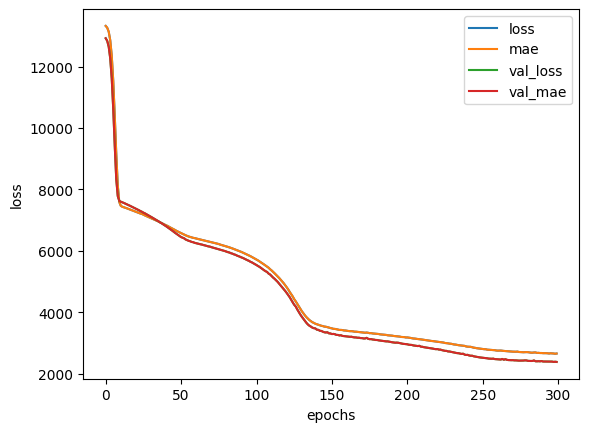

In [9]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")